In [598]:
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [599]:
train_data = pd.read_csv("./titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [600]:
test_data = pd.read_csv("./titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [601]:
print("Number of missing values:\n" + str(train_data.isnull().sum()))

# Replace missing values with the median age
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())

# Replace NA values in Embarked column with S
train_data["Embarked"] = train_data["Embarked"].fillna("S")
test_data["Embarked"] = test_data["Embarked"].fillna("S")

# Replace NA values in Cabin with "C1"
train_data["Cabin"] = train_data["Cabin"].fillna("Other")
test_data["Cabin"] = test_data["Cabin"].fillna("Other")

# Replace Sex column with numbers
#train_data["Sex"] = train_data["Sex"].replace({'male': 1, 'female': 2})
#test_data["Sex"] = test_data["Sex"].replace({'male': 1, 'female': 2})

print("Number of missing values: " + str(train_data.isnull().sum().sum()))

Number of missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Number of missing values: 0


C:\Users\Antonio-PC\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Antonio-PC\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

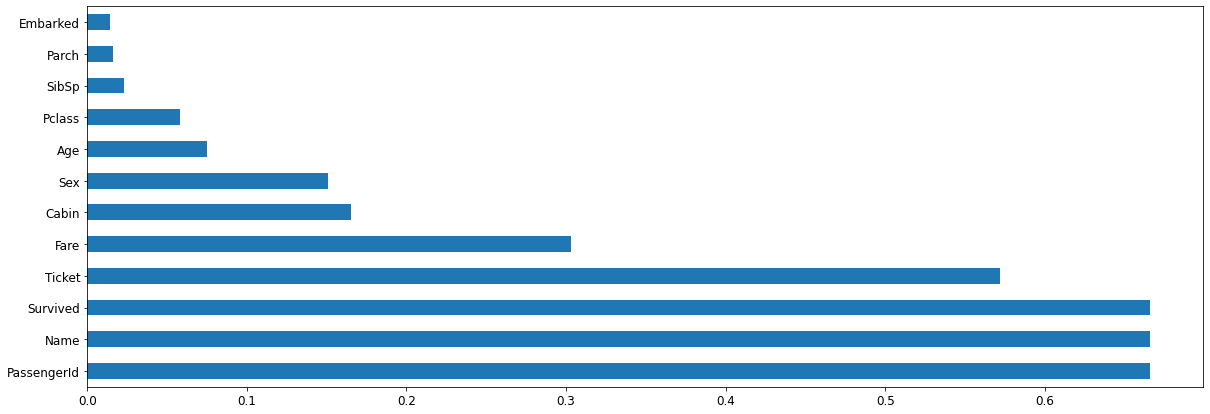

In [602]:
y_train = train_data.Survived.values
df_mi = train_data.apply(lambda col: mutual_info_score(col, y_train)).sort_values(ascending=False).head(20)
round(df_mi,3).plot(kind='barh', figsize=(20,7), fontsize=12)

In [603]:
print("People who survived: " + str(len(train_data[train_data.Survived == 1])))
print("People who died: " + str(len(train_data[train_data.Survived == 0])))
print("Male survived: " + str(len(train_data[(train_data.Sex == 1) & (train_data.Survived == 1)])))
print("Female survived: " + str(len(train_data[(train_data.Sex == 2) & (train_data.Survived == 1)])))
print("Survival rate: " + str(len(train_data[train_data.Survived == 1]) / len(train_data[train_data.Survived == 0])))
print("Male survival rate: " + str(len(train_data[(train_data.Sex == 1) & (train_data.Survived == 1)]) / len(train_data[train_data.Survived == 0])))
print("Female survival rate: " + str(len(train_data[(train_data.Sex == 2) & (train_data.Survived == 1)]) / len(train_data[train_data.Survived == 0])))

People who survived: 342
People who died: 549
Male survived: 0
Female survived: 0
Survival rate: 0.6229508196721312
Male survival rate: 0.0
Female survival rate: 0.0


In [604]:
# Drop columns that are not important
train_data = train_data.drop(["PassengerId", "Name", "Fare", "Ticket", "Survived"], axis=1)

In [605]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.0,1,0,Other,S
1,1,female,38.0,1,0,C85,C
2,3,female,26.0,0,0,Other,S
3,1,female,35.0,1,0,C123,S
4,3,male,35.0,0,0,Other,S


In [606]:
from sklearn.ensemble import RandomForestClassifier

features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
model.fit(X, y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [607]:
#women = train_data.loc[train_data.Sex == 2]["Survived"]
#rate_women = sum(women)/len(women)

#print("% of women who survived:", rate_women)

In [608]:
from sklearn.model_selection import cross_validate
cv_result = cross_validate(model, X, y, cv=5)
cv_result

{'fit_time': array([0.08178186, 0.08078361, 0.08078408, 0.08078408, 0.0807848 ]),
 'score_time': array([0.00698161, 0.00797915, 0.0079782 , 0.00797892, 0.00797868]),
 'test_score': array([0.83240223, 0.8258427 , 0.82022472, 0.80337079, 0.85955056])}

In [609]:
scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.828 +/- 0.018
